### Задача

По данным крупного интернет-магазина (датасет с гипотезами, посетителями и заказами) необходимо приоритизировать гипотезы, проанализировать результаты A/B-теста и сделать вывод. 

### Оглавление

[1. Приоритизация гипотез](#1.-Приоритизация-гипотез)  
&nbsp;&nbsp;&nbsp;&nbsp;[1.1-ICE](#1.1-ICE)  
&nbsp;&nbsp;&nbsp;&nbsp;[1.2 RICE](#1.2-RICE)  
[2. Анализ A/B-теста](#2.-Анализ-A/B-теста)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.1 Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.](#2.1-Постройте-график-кумулятивной-выручки-по-группам.-Сделайте-выводы-и-предположения.)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.2 Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.](#2.2-Постройте-график-кумулятивного-среднего-чека-по-группам.-Сделайте-выводы-и-предположения.)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.3 Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.](#2.3-Постройте-график-относительного-изменения-кумулятивного-среднего-чека-группы-B-к-группе-A.-Сделайте-выводы-и-предположения.)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.4 Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.](#2.4-Постройте-график-кумулятивной-конверсии-по-группам.-Сделайте-выводы-и-предположения.)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.5 Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.](#2.5-Постройте-график-относительного-изменения-кумулятивной-конверсии-группы-B-к-группе-A.-Сделайте-выводы-и-предположения.)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.6 Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.](#2.6-Постройте-точечный-график-количества-заказов-по-пользователям.-Сделайте-выводы-и-предположения.)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.7 Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.](#2.7-Посчитайте-95-й-и-99-й-перцентили-количества-заказов-на-пользователя.-Выберите-границу-для-определения-аномальных-пользователей.)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.8 Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.](#2.8-Постройте-точечный-график-стоимостей-заказов.-Сделайте-выводы-и-предположения.)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.9 Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.](#2.9-Посчитайте-95-й-и-99-й-перцентили-стоимости-заказов.-Выберите-границу-для-определения-аномальных-заказов.)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.10 Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.](#2.10-Посчитайте-статистическую-значимость-различий-в-конверсии-между-группами-по-«сырым»-данным.-Сделайте-выводы-и-предположения.)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.11 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.](#2.11-Посчитайте-статистическую-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«сырым»-данным.-Сделайте-выводы-и-предположения.)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.12 Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.](#2.12-Посчитайте-статистическую-значимость-различий-в-конверсии-между-группами-по-«очищенным»-данным.-Сделайте-выводы-и-предположения.)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.13 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.](#2.13-Посчитайте-статистическую-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«очищенным»-данным.-Сделайте-выводы-и-предположения.)  
[3. Общий вывод](#3.-Общий-вывод)

### Импорт библиотек и настройки

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

sns.set(style='whitegrid')

### Открытие и изучение данных

In [2]:
hyp = pd.read_csv('../datasets/hypothesis.csv')
hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [3]:
orders = pd.read_csv('../datasets/orders.csv')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [4]:
visitors = pd.read_csv('../datasets/visitors.csv')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пропусков нет, даты приведем к нужному типу - datetime64

In [5]:
orders['date'] = pd.to_datetime(orders['date'],format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'],format='%Y-%m-%d')

In [6]:
orders['date'].head()

0   2019-08-15
1   2019-08-15
2   2019-08-15
3   2019-08-15
4   2019-08-15
Name: date, dtype: datetime64[ns]

In [7]:
visitors['date'].head()

0   2019-08-01
1   2019-08-02
2   2019-08-03
3   2019-08-04
4   2019-08-05
Name: date, dtype: datetime64[ns]

### 1. Приоритизация гипотез

In [8]:
hyp

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


#### 1.1 ICE

In [9]:
hyp['Ice'] = (hyp['Impact'] * hyp['Confidence']) / hyp['Efforts']

#### 1.2 RICE

In [10]:
hyp['Rice'] = (hyp['Reach'] * hyp['Impact'] * hyp['Confidence']) / hyp['Efforts']

In [11]:
hyp.sort_values(by='Rice', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,Ice,Rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


По значениям Ice самые приоритетные гипотезы - 8, 0, 7, 6.  
По значениям Rice самые приоритетные гипотезы - 7, 2, 0, 6.  
Данные по Rice более предпочтительны, так как учитывают важный показатель - охват аудитории.  
Разница результатов как раз основана на этом дополнительном показателе.  
По результатам приоритизации можно сказать, несмотря на разницу в оценках, оба расчета показали, что 3, 1, 5, 4 - самые не приоритетные гипотезы.

### 2. Анализ A/B-теста

#### 2.1 Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

Создадим датафрейм с уникальными сочетаниями дат и групп.

In [12]:
dategroup = orders[['date', 'group']].drop_duplicates()
dategroup.head(5)

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Соберем кумулятивные данные по выделенным дням.

In [13]:
order_agg = dategroup.apply(lambda x:
                                 orders[np.logical_and(
                                 orders['date'] <= x['date'], 
                                 orders['group'] == x['group'])]
                                 .agg({'date' : 'max', 
                                       'group' : 'max',
                                       'visitorId' : 'nunique', 
                                       'transactionId' : 'nunique',
                                       'revenue' : 'sum'
                                      }), axis=1)\
                            .sort_values(by=['date', 'group'])
order_agg.head(5)

,date,group,visitorId,transactionId,revenue
55,2019-08-01,A,20,24,148579
66,2019-08-01,B,20,21,101217
175,2019-08-02,A,38,44,242401
173,2019-08-02,B,43,45,266748
291,2019-08-03,A,62,68,354874


In [14]:
visitor_agg = dategroup.apply(lambda x:
                                 visitors[np.logical_and(
                                 visitors['date'] <= x['date'], 
                                 visitors['group'] == x['group'])]
                                 .agg({'date' : 'max', 
                                       'group' : 'max',
                                       'visitors' : 'sum'
                                      }), axis=1)\
                            .sort_values(by=['date', 'group'])
visitor_agg.head(5)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединим таблицы с кумулятивными данными.

In [15]:
data_cum = order_agg.merge(visitor_agg, on=['date', 'group'])
data_cum.columns = ['date', 'group', 'buyers', 'orders', 'revenue', 'visitors']
data_cum.head(5)

,date,group,buyers,orders,revenue,visitors
0,2019-08-01,A,20,24,148579,719
1,2019-08-01,B,20,21,101217,713
2,2019-08-02,A,38,44,242401,1338
3,2019-08-02,B,43,45,266748,1294
4,2019-08-03,A,62,68,354874,1845


Построим график кумулятивной выручки по дням и группам.

Text(0.5, 1.0, 'Кумулятивная выручка по дням и группам')

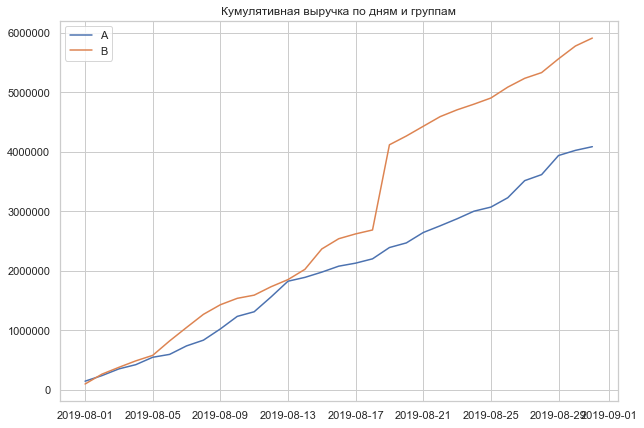

In [16]:
cum_A = data_cum[data_cum['group'] == 'A'][['date', 'revenue', 'orders']]
cum_B = data_cum[data_cum['group'] == 'B'][['date', 'revenue', 'orders']]

plt.figure(figsize=(10,7))
plt.plot(cum_A['date'], cum_A['revenue'], label='A')
plt.plot(cum_B['date'], cum_B['revenue'], label='B')
plt.legend()
plt.title('Кумулятивная выручка по дням и группам')

Группа В стабильно лучше по показателю, чем группа А. Но в группе В есть резкий подъем, который связан с аномальными значениями. После него график стабилизировался. Из-за выброса точную разницу по кумулятивной выручке сказать нельзя.

#### 2.2 Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

Text(0.5, 1.0, 'Кумулятивный средний чек по группам')

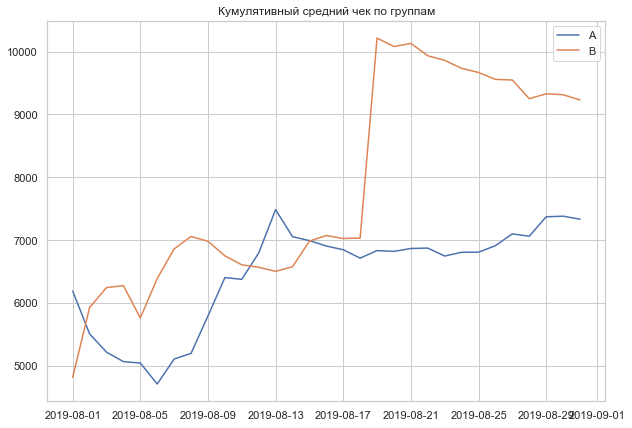

In [17]:
plt.figure(figsize=(10,7))
plt.plot(cum_A['date'], cum_A['revenue'] / cum_A['orders'], label='A')
plt.plot(cum_B['date'], cum_B['revenue'] / cum_B['orders'], label='B')
plt.legend()
plt.title('Кумулятивный средний чек по группам')

На данном графике тоже видно влияние аномальных значений на кумулятивный средний чек в группе В. Вероятно в группе В есть особо крупные покупки. График становится равномерным только ближе к концу, при этом в группе А наблюдается слабый восходящий тренд, а в группе В - низходящий. 

#### 2.3 Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

Объединим данные в один датафрейм.

In [18]:
merge_cum_rev = cum_A.merge(cum_B, on='date', suffixes=['A','B'])
merge_cum_rev.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


Рассчитаем относительное изменение кумулятивного среднего чека и построим график.

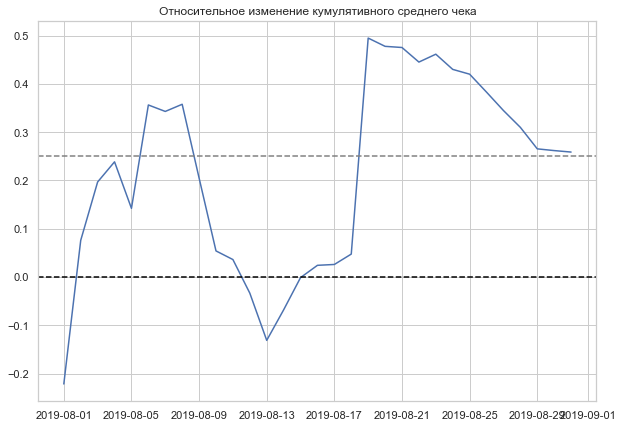

In [19]:
plt.figure(figsize=(10,7))
plt.plot(merge_cum_rev['date'] ,(
        (merge_cum_rev['revenueB'] / merge_cum_rev['ordersB']
         ) / (merge_cum_rev['revenueA'] / merge_cum_rev['ordersA']) - 1))

plt.title('Относительное изменение кумулятивного среднего чека')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.25, color='gray', linestyle='--')

Есть резкие перепады, как скачки, так и спады. График не плавный. Необходима проверка на аномальные значения. К концу графика группа В имеет средний чек выше, но разница постепенно идёт на спад.

#### 2.4 Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

Рассчитаем конверсию.

In [20]:
data_cum['conversion'] = data_cum['orders'] / data_cum['visitors']

Построим график для двух групп.

Text(0.5, 1.0, 'Кумулятивная конверсия по группам')

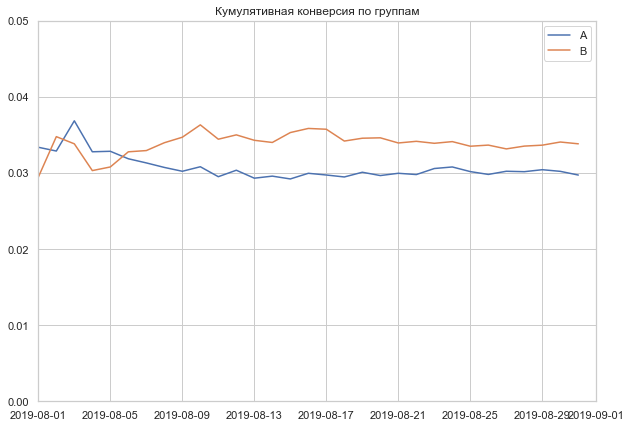

In [21]:
cum_conv_A = data_cum[data_cum['group'] == 'A'][['date', 'conversion']]
cum_conv_B = data_cum[data_cum['group'] == 'B'][['date', 'conversion']]

plt.figure(figsize=(10,7))
plt.plot(cum_conv_A['date'], cum_conv_A['conversion'], label='A')
plt.plot(cum_conv_B['date'], cum_conv_B['conversion'], label='B')

plt.legend()
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), 0, 0.05])
plt.title('Кумулятивная конверсия по группам')

В начале были сильные колебания, но потом график все больше сглаживался. Показатель в группе В стабильно больше.

#### 2.5 Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

Объединим данные в один датафрейм.

In [22]:
merge_cum_conv = cum_conv_A.merge(cum_conv_B, on='date', suffixes=['A','B'])
merge_cum_conv.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


Рассчитаем относительное изменение конверсии и построим график.

[Timestamp('2019-08-01 00:00:00'), Timestamp('2019-09-01 00:00:00'), -0.2, 0.3]

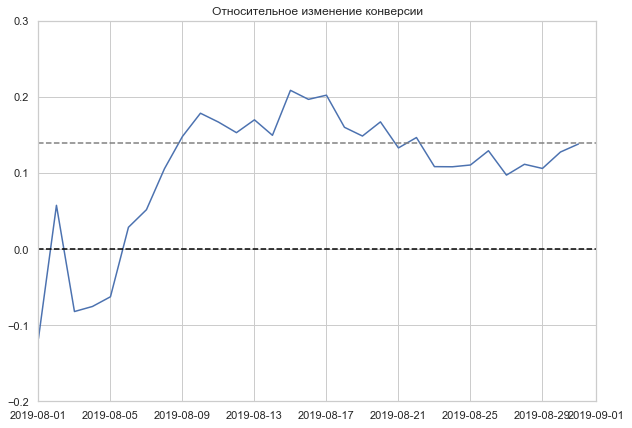

In [23]:
plt.figure(figsize=(10,7))
plt.plot(merge_cum_conv['date'],
        merge_cum_conv['conversionB'] / merge_cum_conv['conversionA'] - 1)

plt.title('Относительное изменение конверсии')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='gray', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), -0.2, 0.3])

В начале группа В уступала группе А по конверсии, но затем, большую часть теста имела показатели выше. 

#### 2.6 Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

Рассчитаем количество заказов на одного пользователя.

In [24]:
orders_count = orders.groupby('visitorId').agg({'transactionId' : 'nunique'})['transactionId'].reset_index()
orders_count.columns = ['userId', 'orders']
orders_count.head()

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


Построим график.

Text(0, 0.5, 'orders_count')

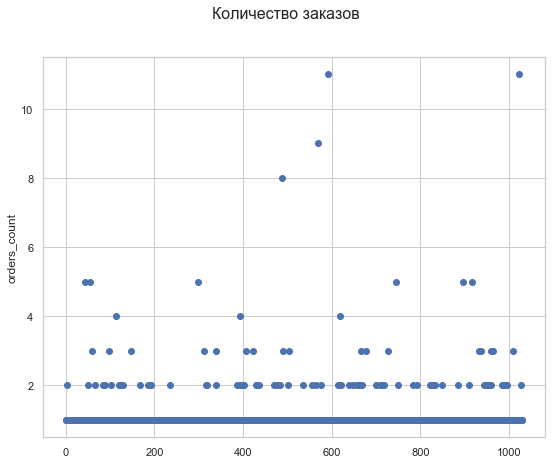

In [25]:
fig = plt.figure(figsize=(9,7))
fig.suptitle('Количество заказов', fontsize=16)

x_values = pd.Series(range(0, len(orders_count['orders'])))
plt.scatter(x_values, orders_count['orders'])
plt.ylabel('orders_count')

В основном пользователь оформляет один заказ, но два заказа тоже часто встречаются.

#### 2.7 Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [26]:
print(np.percentile(orders_count['orders'], [95, 99]))

[2. 4.]


Будем считать аномальными пользователями всех, кто оформил более 2 заказов, то есть отсечем 5% пользователей.

#### 2.8 Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

Text(0, 0.5, 'revenue')

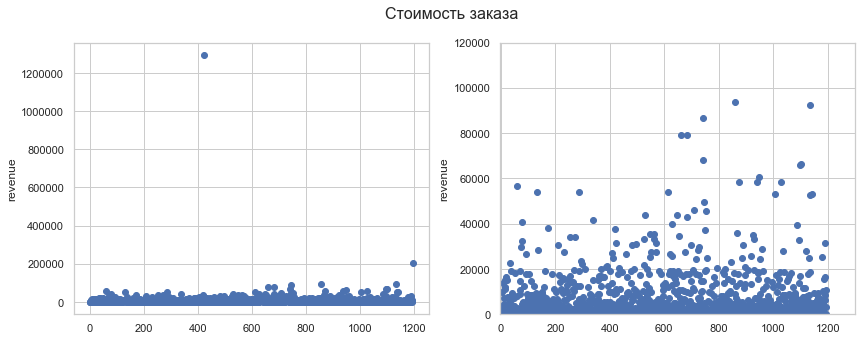

In [27]:
fig = plt.figure(figsize=(14,5))
fig.suptitle('Стоимость заказа', fontsize=16)

ax1 = fig.add_subplot(121)
x_values = pd.Series(range(0, len(orders['revenue'])))
ax1 = plt.scatter(x_values, orders['revenue'])
plt.ylabel('revenue')

ax2 = fig.add_subplot(122)
ax2 = plt.scatter(x_values, orders['revenue'])
plt.axis([-5, 1300, 0, 120000])
plt.ylabel('revenue')

Большинство пользователей тратят за покупку примерно до 25000, на сумму от 20000 до 100000 оформляется намного меньше заказов, но есть 2 особо аномальных значения - около 200000 и около 1300000, которые оказывают сильное влияние на рассчитанные метрики.

#### 2.9 Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [28]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Отсечем 1% заказов, все, что больше 58233.

#### 2.10 Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Рассчитаем общее количество пользователей в каждой группе по дням.

In [29]:
visitors_daily_A = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_A.columns = ['date', 'visitorsPerDateA']
visitors_daily_A.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [30]:
visitors_daily_B = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_B.columns = ['date', 'visitorsPerDateB']
visitors_daily_B.head()

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


Создадим датафрейм с покупателями и их количеством покупок по группам.

In [31]:
orders_countA = orders[orders['group'] == 'A'].groupby('visitorId').agg({'transactionId' : 'nunique'})['transactionId'].reset_index()
orders_countA.columns = ['userId', 'orders']
orders_countA.head()

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [32]:
orders_countB = orders[orders['group'] == 'B'].groupby('visitorId').agg({'transactionId' : 'nunique'})['transactionId'].reset_index()
orders_countB.columns = ['userId', 'orders']
orders_countB.head()

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Создадим выборки, в которых будет количество заказов всех пользователей.

In [33]:
sampleA = pd.concat([orders_countA['orders'],
                     pd.Series(0,
                               index = np.arange(visitors_daily_A['visitorsPerDateA'].sum() - len(orders_countA)),
                               name='all_orders')
                    ], axis=0)
sampleA.head()

0    1
1    1
2    1
3    1
4    1
dtype: int64

In [34]:
sampleB = pd.concat([orders_countB['orders'],
                     pd.Series(0, 
                               index = np.arange(visitors_daily_B['visitorsPerDateB'].sum() - len(orders_countB)),
                               name='all_orders')
                    ], axis=0)
sampleB.head()

0    1
1    1
2    1
3    1
4    1
dtype: int64

Посчитаем статистическую значимость различий в конверсии.

Нулевая гипотеза - различий в конверсии между группами нет. 
Альтернативная гипотеза - различия в конверсии между группами есть.

In [35]:
st_con1 = st.mannwhitneyu(sampleA, sampleB)[1]
print('{0:.3f}'.format(st_con1))
if st_con1 > 0.05:
    print('Статистически значимых различий в конверсии нет')
else:
    print('Статистически значимые различия в конверсии есть')        

0.008
Статистически значимые различия в конверсии есть


In [36]:
print('{0:.3f}'.format(sampleB.mean() / sampleA.mean()-1))

0.138


Отвергаем нулевую гипотезу. Различия есть, в среднем значения конверсии в группе В на 13.8% больше.

#### 2.11 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Нулевая гипотеза - различий в среднем чеке между группами нет. Альтернативная гипотеза - различия в среднем чеке между группами есть.

In [37]:
st_rev1 = st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]
print('{0:.3f}'.format(st_rev1))
if st_rev1 > 0.05:
    print('Статистически значимых различий в среднем чеке нет')
else:
    print('Статистически значимые различия в среднем чеке есть')

0.365
Статистически значимых различий в среднем чеке нет


In [38]:
print('{0:.3f}'.format(
    orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean()-1))

0.259


Не можем отвергнуть нулевую гипотезу. Хотя относительная разница по среднему чеку между группами составила 25.9%

#### 2.12 Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

Сделаем срез аномальных пользователей: тех, кто оформил более 2 заказов и кто потратил более 58233.

In [39]:
users_many_orders = pd.concat(
    [orders_countA[orders_countA['orders'] > 2]['userId'], orders_countB[orders_countB['orders'] > 2]['userId']])

In [40]:
users_expensive_orders = orders[orders['revenue'] > 58233]['visitorId']
users_expensive_orders.name = 'userId'
users_expensive_orders.head()

425    1920142716
662    4266935830
682    4266935830
743    4133034833
744     888512513
Name: userId, dtype: int64

Создадим общую таблицу аномальных пользователей.

In [41]:
abnormal_users = pd.concat([
    users_many_orders, users_expensive_orders
], axis=0).drop_duplicates().sort_values()
print(abnormal_users.head())
len(abnormal_users)

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
Name: userId, dtype: int64


31

Создадим выборки без аномальных пользователей.

In [42]:
sampleA_filtered = pd.concat([orders_countA[~orders_countA['userId'].isin(abnormal_users)]['orders'],
                     pd.Series(0,
                               index = np.arange(visitors_daily_A['visitorsPerDateA'].sum() - len(orders_countA)),
                               name='all_orders')
                    ], axis=0)
sampleA_filtered.head()

0    1
1    1
2    1
3    1
4    1
dtype: int64

In [43]:
sampleB_filtered = pd.concat([orders_countB[~orders_countB['userId'].isin(abnormal_users)]['orders'],
                     pd.Series(0,
                               index = np.arange(visitors_daily_B['visitorsPerDateB'].sum() - len(orders_countB)),
                               name='all_orders')
                    ], axis=0)
sampleB_filtered.head()

0    1
1    1
2    1
3    1
4    1
dtype: int64

Посчитаем статистическую значимость различий в конверсии между группами.

Нулевая гипотеза - различий в конверсии между группами нет. Альтернативная гипотеза - различия в конверсии между группами есть.

In [44]:
st_con2 = st.mannwhitneyu(sampleA_filtered, sampleB_filtered)[1]
print('{0:.3f}'.format(st_con2))
if st_con2 > 0.05:
    print('Статистически значимых различий в конверсии нет')
else:
    print('Статистически значимые различия в конверсии есть')

0.005
Статистически значимые различия в конверсии есть


In [45]:
print('{0:.3f}'.format(sampleB_filtered.mean() / sampleA_filtered.mean()-1))

0.174


Отвергаем нулевую гипотезу.  
p-value по "очищенным" данным стал еще ниже.  
Различия по конверсии сохранились, прирост средней конверсии в группе В вырос на 3.6% и достиг 17.4%.

#### 2.13 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.



Нулевая гипотеза - различий в среднем чеке между группами нет. Альтернативная гипотеза - различия в среднем чеке между группами есть.


In [46]:
st_rev2 = st.mannwhitneyu(
    orders[(orders['group'] == 'A') & ~(orders['visitorId'].isin(abnormal_users))]['revenue'],
    orders[(orders['group'] == 'B') & ~(orders['visitorId'].isin(abnormal_users))]['revenue'])[1]
print('{0:.3f}'.format(st_rev2))
if st_rev2 > 0.05:
    print('Статистически значимых различий в среднем чеке нет')
else:
    print('Статистически значимые различия в среднем чеке есть')

0.399
Статистически значимых различий в среднем чеке нет


In [47]:
print('{0:.3f}'.format(
    orders[(orders['group'] == 'B') & ~(orders['visitorId'].isin(abnormal_users))]['revenue'].mean() / 
    orders[(orders['group'] == 'A') & ~(orders['visitorId'].isin(abnormal_users))]['revenue'].mean()-1))

-0.020


Не можем отвергнуть нулевую гипотезу. Относительная разница по среднему чеку между группами значительно изменилась. Без учета влияния аномальных данных относительная разница с 25.9% понизилась до -0.2%. Был исключен 1% аномальных данных по выручке и 5% по количеству покупок, что скорректировало значения.


### 3. Общий вывод

Есть статистически значимые различия по конверсии между группами по «сырым» и по данным после фильтрации аномалий. При этом после фильтрации средняя конверсия в группе В больше средней конверсии в группе А на 17.4%.  

Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.  

График различия конверсии между группами показывает, что в начале группа В уступала группе А, но затем, большую часть теста имела показатели выше.   

На графике различия среднего чека видно, что после нескольких перепадов, результаты группы B положительны, но идут на спад.  
  
__Исходя из имеющихся данных, тест следует считать успешным. На данный момент показатель конверсии установился и в среднем достиг +17.4%. По среднему чеку не отмечено статистически значимых различий, значит основная прибыль будет идти от прироста по конверсии.__